In [1]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter

In [10]:
# Population Statistics
def create_population(num_people, positive_fraction):
    
    assert positive_fraction <= 1 and positive_fraction >=0 
    return [1 if np.random.random() <= positive_fraction else 0 for i in range(num_people)]

def error(true, pred):
    return abs(true - pred)

Text(0.5, 1.0, 'Different values of p to ensure privacy')

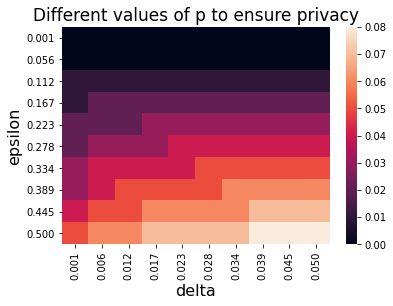

In [6]:
# How does p change with epsilon and delta: 
n = 10**2
true = 0.3
population = create_population(n, true)

n = len(population)
epsilons = np.linspace(0.001, 0.5, 10)
deltas = np.linspace(0.001, 0.05, 10)
X = np.zeros((len(epsilons), len(deltas)))
for i, ep in enumerate(epsilons):
    for j, delta in enumerate(deltas):   
        tau = 3 + np.log(1/delta)
        X[i,j] = int(np.floor(ep*n/tau))/n

p_dependence = pd.DataFrame(X, 
                            index=["{0:.3f}".format(i) for i in epsilons], 
                            columns=["{0:.3f}".format(i) for i in deltas]
                           )        
# Additive mechanisms need a lot of 
ax = sns.heatmap(p_dependence, annot=False)
ax.set_ylabel('epsilon', fontsize=16)
ax.set_xlabel('delta', fontsize=16)
ax.set_title('Different values of p to ensure privacy', fontsize=17)

In [48]:
def sampling(population, epsilon, delta, debug=False):
    
    answer = []
    n = len(population)
    tau = 3 + np.log(1/delta)
    m = int(np.floor(epsilon*n/tau))
    if m <= 0 or m >=n:
        return -1
    
    p = m/n
    if debug:
        print("true fraction: {}".format(sum(population)/n))
        print("n: {} m: {} tau:{} ({}) p:{}".format(n, m, tau, tau/n, p))

    num_to_sample = np.random.binomial(n, p)
    if debug:
        print('Number of samples ', num_to_sample)
        
    answer = np.random.choice(population, size=num_to_sample)
    
    if debug:
        print('Pre-thresholding: {}'.format(sum(answer)/len(answer)))
    if sum(answer) < tau:
        return 0
    else:
        if debug:
            print('ERROR', error(sum(population)/n, sum(answer)/len(answer)))
        return sum(answer)/len(answer)

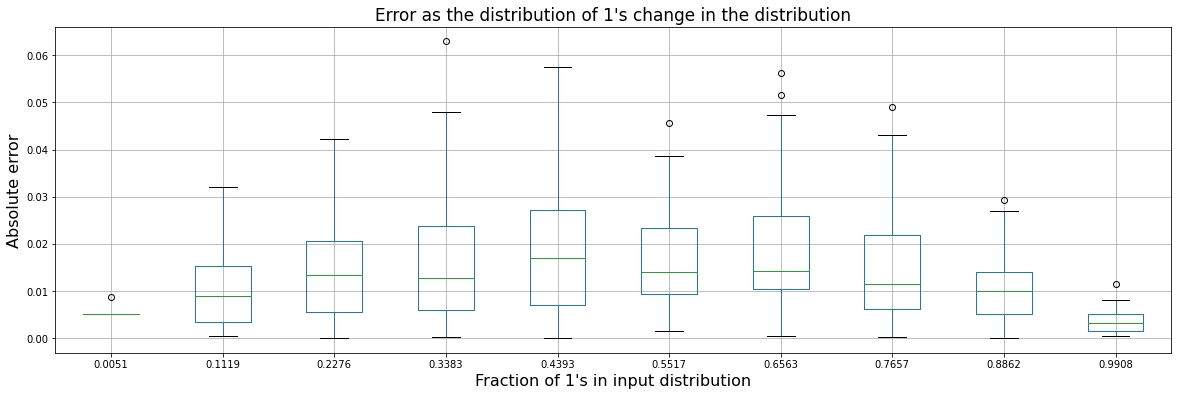

In [60]:
# Independence with distribution of 1's
epsilon = 0.3 # 
delta = 0.05 # Bad things happening
n = 10**4
EPOCHS = 50
ans = defaultdict(list)

trues = np.linspace(0.005, 0.99, 10)
for i, _true in enumerate(trues):
#     sys.stdout.write("\r")
#     sys.stdout.write("{}/{}".format(i+1, len(trues)))
    population = create_population(n, _true)
    true = sum(population)/n
    for epoch in range(EPOCHS):
        pred = sampling(population, epsilon, delta, debug=False)
        ans[true].append(error(true, pred))

ax = pd.DataFrame(ans).boxplot(figsize=(20,6))
# for x in ans:
#     ans[x] = np.mean(ans[x])

# ax = pd.Series(ans).plot(figsize=(20,6), fontsize=14, style='.-')
ax.set_ylabel('Absolute error', fontsize=16)
ax.set_xlabel("Fraction of 1's in input distribution", fontsize=16)
ax.set_title("Error as the distribution of 1's change in the distribution", fontsize=17);
# ax.set_yscale('log')

In [42]:
n = 10**4
_true = 0.8
population = create_population(n, _true)


In [55]:
pred = sampling(population, epsilon, delta, debug=True)

true fraction: 0.8005
n: 10000 m: 500 tau:5.99573227355399 (0.000599573227355399) p:0.05
Number of samples  498
Pre-thresholding: 0.8072289156626506
ERROR 0.0067289156626506585
